In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
from os import environ
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import PIL.Image
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from IPython.display import display, Image
from tkinter import *
from PIL import ImageTk, Image

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

In [ ]:
from IPython.utils.process import shutil
### unpack the data folders
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Brain_Tumor.zip', '/content/drive/MyDrive/DeepLearning')

In [ ]:
import os

In [ ]:
# Creating dataframe by iterating through filepaths
yes_dir=r'/content/drive/MyDrive/DeepLearning/NewDataset/yes'
no_dir=r'/content/drive/MyDrive/DeepLearning/NewDataset/no'
filepaths = []
labels= []
dict_list = [yes_dir, no_dir]
for i, j in enumerate(dict_list): 
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('yes')
        else:
          labels.append('no') 
    
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())

                                           filepaths labels
0  /content/drive/MyDrive/DeepLearning/NewDataset...    yes
1  /content/drive/MyDrive/DeepLearning/NewDataset...    yes
2  /content/drive/MyDrive/DeepLearning/NewDataset...    yes
3  /content/drive/MyDrive/DeepLearning/NewDataset...    yes
4  /content/drive/MyDrive/DeepLearning/NewDataset...    yes
yes    1500
no     1500
Name: labels, dtype: int64


In [ ]:
#shape of datatset
tumor_df.shape

(3000, 2)

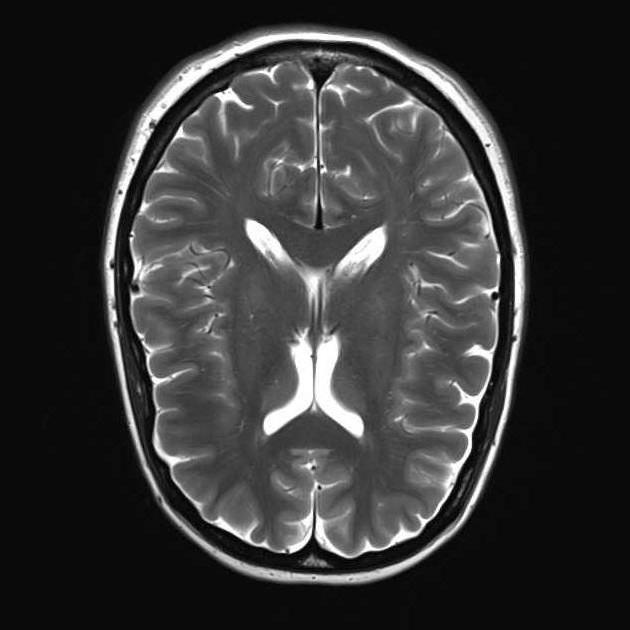

In [ ]:
from PIL import Image
img= Image.open('/content/drive/MyDrive/DeepLearning/NewDataset/no/No12.jpg')
img

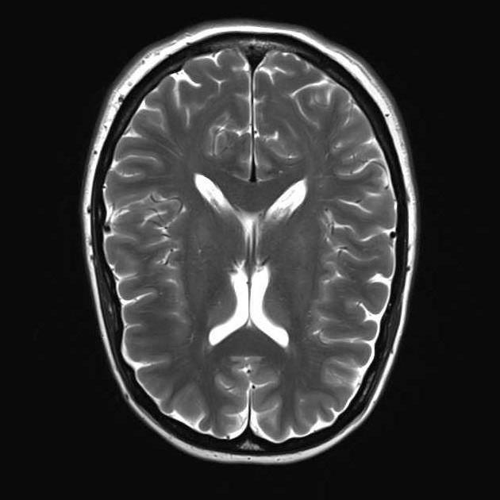

In [ ]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/DeepLearning/NewDataset/no/No12.jpg')
new_size = (500, int(img.size[1] * (500 / img.size[0])))
resized_img = img.resize(new_size)
resized_img.show()

In [ ]:
import os
import cv2
from skimage.transform import resize

In [ ]:
!mkdir  "/content/drive/MyDrive/DeepLearning/Reshape"
!mkdir "/content/drive/MyDrive/DeepLearning/Reshape/No"

In [ ]:
src_dir1 = '/content/drive/MyDrive/DeepLearning/NewDataset/no'
dst_dir1 = '/content/Reshape/No'

if not os.path.exists(dst_dir1):
    os.makedirs(dst_dir1)

for filename in os.listdir(src_dir1):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(src_dir1, filename)
        image = cv2.imread(image_path)

        # Split the image class based on its filename or any other criterion
        image_class = filename.split('_')[0]  # Example: extracting class from "class1_image123.jpg"

        # Resize the image
        resized_image = resize(image, (120, 120))  # Specify the desired width and height

        # Save the resized image to the destination directory
        save_path = os.path.join(dst_dir1, f"{image_class}_{filename}")
        cv2.imwrite(save_path, resized_image)

In [ ]:
!mkdir "/content/Reshape/Yes"

In [ ]:
src_dir2 = '/content/drive/MyDrive/DeepLearning/NewDataset/yes'
dst_dir2 = '/content/Reshape/Yes'

if not os.path.exists(dst_dir2):
    os.makedirs(dst_dir2)

for filename in os.listdir(src_dir2):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(src_dir2, filename)
        image = cv2.imread(image_path)

        # Split the image class based on its filename or any other criterion
        image_class = filename.split('_')[0]  # Example: extracting class from "class1_image123.jpg"

        # Resize the image
        resized_image = resize(image, (120, 120))  # Specify the desired width and height

        # Save the resized image to the destination directory
        save_path = os.path.join(dst_dir2, f"{image_class}_{filename}")
        cv2.imwrite(save_path, resized_image)

In [ ]:
import cv2
import os

def resize_image(image, width, height):
    # Resize the image using the specified width and height
    resized_image = cv2.resize(image, (width, height))

    return resized_image

src_dir_yes = '/content/drive/MyDrive/DeepLearning/NewDataset/yes'
src_dir_no = '/content/drive/MyDrive/DeepLearning/NewDataset/no'
dst_dir_yes = '/content/Reshape/Yes'
dst_dir_no = '/content/Reshape/No'

# Create destination directories if they don't exist
if not os.path.exists(dst_dir_yes):
    os.makedirs(dst_dir_yes)

if not os.path.exists(dst_dir_no):
    os.makedirs(dst_dir_no)

# Resize images in the "yes" directory
for filename in os.listdir(src_dir_yes):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(src_dir_yes, filename)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = resize_image(image, 120, 120)  # Specify the desired width and height

        # Save the resized image to the destination directory
        save_path = os.path.join(dst_dir_yes, filename)
        cv2.imwrite(save_path, resized_image)

# Resize images in the "no" directory
for filename in os.listdir(src_dir_no):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(src_dir_no, filename)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = resize_image(image, 120, 120)  # Specify the desired width and height

        # Save the resized image to the destination directory
        save_path = os.path.join(dst_dir_no, filename)
        cv2.imwrite(save_path, resized_image)

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
!mkdir '/content/drive/MyDrive/DeepLearning/Splitted'

mkdir: cannot create directory ‘/content/drive/MyDrive/DeepLearning/Splitted’: File exists


In [ ]:
splitfolders.ratio("/content/Reshape",
                   output="/content/drive/MyDrive/DeepLearning/Splitted",
seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

Copying files: 3000 files [00:21, 140.74 files/s]


In [ ]:
import os

train_folder = '/content/drive/MyDrive/DeepLearning/Splitted/train'
val_folder = '/content/drive/MyDrive/DeepLearning/Splitted/val'
test_folder = '/content/drive/MyDrive/DeepLearning/Splitted/test'

train_count = len(os.listdir(train_folder))
val_count = len(os.listdir(val_folder))
test_count = len(os.listdir(test_folder))

print("Number of images in the train folder:", train_count)
print("Number of images in the validation folder:", val_count)
print("Number of images in the test folder:", test_count)


Number of images in the train folder: 2
Number of images in the validation folder: 2
Number of images in the test folder: 2


In [ ]:
import os

output_folder = '/content/drive/MyDrive/DeepLearning/Splitted'

# Get the paths to the train, validation, and test folders
train_folder = os.path.join(output_folder, 'train')
val_folder = os.path.join(output_folder, 'val')
test_folder = os.path.join(output_folder, 'test')

# Function to count images in a folder
def count_images_in_folder(folder):
    subfolders = os.listdir(folder)
    counts = {}
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        counts[subfolder] = len(os.listdir(subfolder_path))
    return counts

# Count the number of images in each folder
train_counts = count_images_in_folder(train_folder)
val_counts = count_images_in_folder(val_folder)
test_counts = count_images_in_folder(test_folder)

# Print the image counts for each folder
print("Images in train folder:")
print(train_counts)
print("\nImages in validation folder:")
print(val_counts)
print("\nImages in test folder:")
print(test_counts)

Images in train folder:
{'No': 2456, 'Yes': 2329}

Images in validation folder:
{'No': 1074, 'Yes': 1100}

Images in test folder:
{'No': 1056, 'Yes': 882}


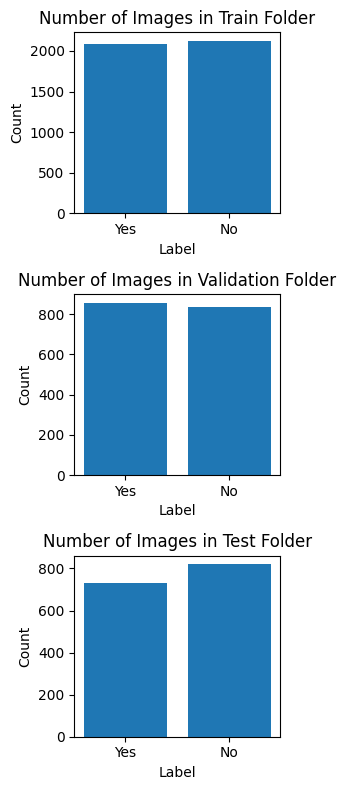

In [ ]:
import matplotlib.pyplot as plt

# Define the folder names and image counts
folders = ['Train', 'Validation', 'Test']
yes_counts = [2084, 857, 730]
no_counts = [2123, 833, 820]

# Create separate bar plots for each folder
fig, axs = plt.subplots(3, 1, figsize=(3, 8))

for i in range(3):
    axs[i].bar(['Yes', 'No'], [yes_counts[i], no_counts[i]])
    axs[i].set_xlabel('Label')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Number of Images in {folders[i]} Folder')

plt.tight_layout()
plt.show()

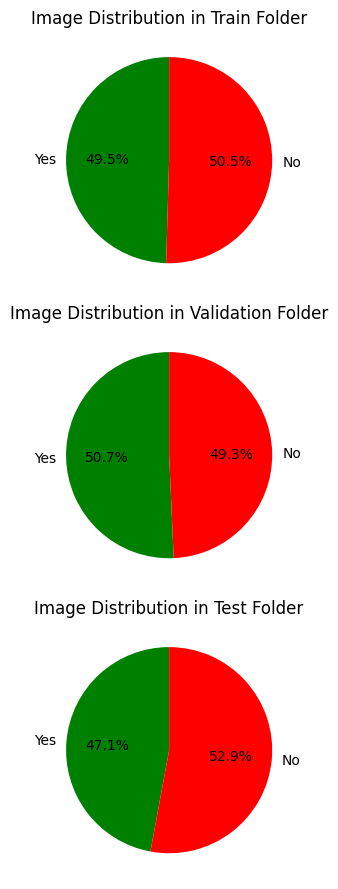

In [ ]:
import matplotlib.pyplot as plt

# Define the folder names and image counts
folders = ['Train', 'Validation', 'Test']
yes_counts = [2084, 857, 730]
no_counts = [2123, 833, 820]

# Create a pie chart for each folder
fig, axs = plt.subplots(3, 1, figsize=(4, 9))

for i in range(3):
    # Combine the counts for 'Yes' and 'No'
    counts = [yes_counts[i], no_counts[i]]

    # Define labels for the pie chart
    labels = ['Yes', 'No']

    # Define colors for the pie chart
    colors = ['green', 'red']

    # Create the pie chart
    axs[i].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

    # Set the aspect ratio to be equal, so that the pie is drawn as a circle
    axs[i].set_aspect('equal')

    # Set the title
    axs[i].set_title(f'Image Distribution in {folders[i]} Folder')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
train_dir = '/content/drive/MyDrive/DeepLearning/Splitted/train'
val_dir = '/content/drive/MyDrive/DeepLearning/Splitted/val'
test_dir = '/content/drive/MyDrive/DeepLearning/Splitted/test'

# Define data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalize validation and test data without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)


Found 4785 images belonging to 2 classes.
Found 2174 images belonging to 2 classes.
Found 1938 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[early_stopping])

# Get training and validation loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get training and validation accuracy histories
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Print training and validation loss and accuracy
print('Training Loss:', training_loss)
print('Validation Loss:', validation_loss)
print('Training Accuracy:', training_accuracy)
print('Validation Accuracy:', validation_accuracy)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

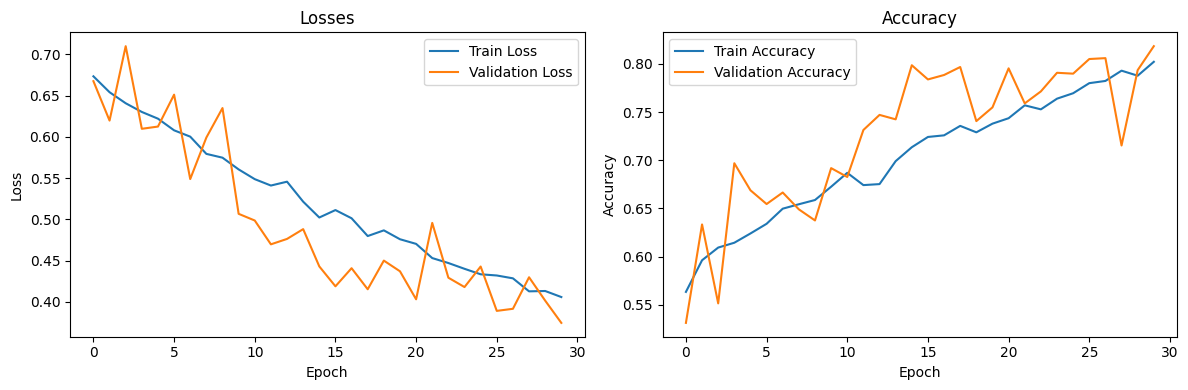

61/61 [==============================] - 4s 66ms/step - loss: 0.3773 - accuracy: 0.8266
Test Loss: 0.37733277678489685
Test Accuracy: 0.826625406742096


In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.6 MB/s eta 0:00:00


## Tuning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get the model's prediction on the test data
predictions = model.predict(test_generator)
# Convert predictions to binary class values
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Get the true class labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, binary_predictions)

# Calculate precision
precision = precision_score(true_labels, binary_predictions)

# Calculate recall
recall = recall_score(true_labels, binary_predictions)

# Calculate F1 score
f1 = f1_score(true_labels, binary_predictions)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


61/61 [==============================] - 7s 111ms/step
Accuracy:  0.49948400412796695
Precision:  0.445409429280397
Recall:  0.4070294784580499
F1 Score:  0.4253554502369668


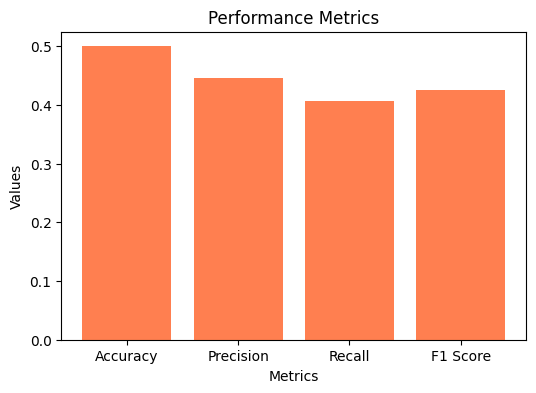

In [ ]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = [accuracy, precision, recall, f1]

# Metrics names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(metrics_names, metrics_values, color='coral')
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Performance Metrics")

# Display the plot
plt.show()


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


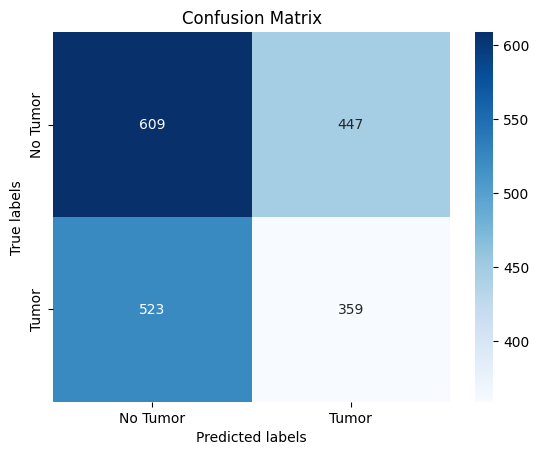

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Define figure and axes
fig, ax = plt.subplots()

# Create a heatmap of the confusion matrix with labels
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add tick labels
ax.xaxis.set_ticklabels(['No Tumor', 'Tumor'])
ax.yaxis.set_ticklabels(['No Tumor', 'Tumor'])

plt.show()


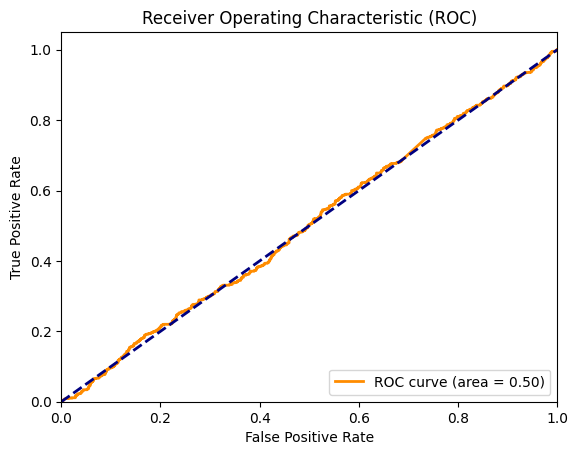

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
